✅ Datasets merged successfully!
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      1  
1  December 31, 2017      1  
2  December 30, 2017      1  
3  December 29, 2017      1  
4  December 25, 2017      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0

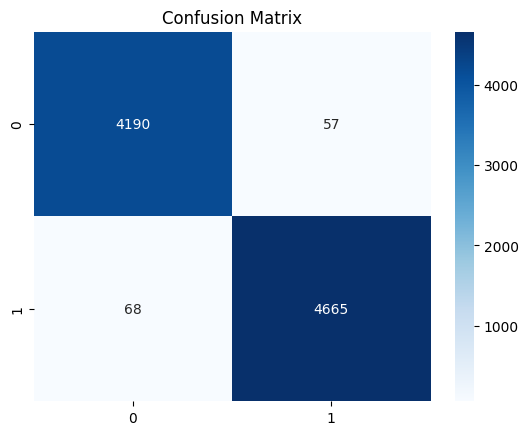

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4247
           1       0.99      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [1]:
# ✅ जरूरी libraries import करो
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Fake और True datasets को load करो
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

# ✅ Fake data के लिए label = 1 और True data के लिए label = 0 assign करो
df_fake['label'] = 1
df_true['label'] = 0

# ✅ दोनों datasets को combine करो
df = pd.concat([df_fake, df_true], axis=0)

# ✅ Combined dataset को save करो (optional)
df.to_csv('fake_news.csv', index=False)
print("✅ Datasets merged successfully!")

# ✅ Dataset load करो
df = pd.read_csv('fake_news.csv')

# ✅ Dataset को check करो
print(df.head())
print(df.info())

# ✅ Missing values को handle करो
df = df.fillna('')

# ✅ Data को clean करो
def clean_text(text):
    text = text.lower() # Lowercase करो
    text = re.sub(r'.*?', '', text) # Brackets हटाओ
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # URLs हटाओ
    text = re.sub(r'<.*?>+', '', text) # HTML tags हटाओ
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), '', text) # Punctuation हटाओ
    text = re.sub(r'\n', '', text) # Newline हटाओ
    text = re.sub(r'\w*\d\w*', '', text) # Numbers हटाओ
    return text

# ✅ Text data को clean करो
df['text'] = df['text'].apply(clean_text)

# ✅ Target define करो (1 = Fake, 0 = Real)
X = df['text']
y = df['label']

# ✅ Train-test split करो (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Text data को vectorize करो (TF-IDF का use करो)
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# ✅ Logistic Regression model train करो
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ✅ Prediction करो
y_pred = model.predict(X_test)

# ✅ Accuracy check करो
accuracy = accuracy_score(y_test, y_pred)
print(f'✅ Accuracy: {accuracy:.2f}')

# ✅ Confusion matrix plot करो
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()

# ✅ Classification report show करो
print(classification_report(y_test, y_pred))

